## Computer Vision
## Name: Dhikusooka Joshua
## RegNo: 2022/HD05/22178U
## StudentNo: 2200722178

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

In [2]:
# vidcap = cv2.VideoCapture("/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/Garden Video.mp4")

In [3]:
# success,frame = vidcap.read()
# success

In [4]:
# count = 0

# extract frames from video

In [5]:

# while vidcap.isOpened():
#     success,frame = vidcap.read()
#     if success:
#         cv2.imwrite("/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/pyframe/%d.png"% count, frame)
#         count+=1
#     else:
#         break

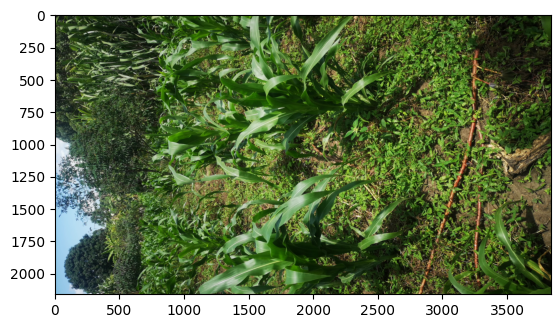

In [6]:
im = Image.open('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/frame/frame00001.png') 
plt.imshow(im) 
plt.show() 

# # do this once resize Images

In [16]:

# DirectoryPath = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/cropped/cassava"

# for dirname, _, filenames in os.walk(DirectoryPath):
#     for filename in filenames:
# # for Img in Images:
#         BaseImg = Image.open(os.path.join(dirname, filename));
    
#         #Tresize image
#         newsize = (240, 240)
#         im1 = BaseImg.resize(newsize)

#         im1.save("/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/resized/cassava/"+filename)

In [56]:
ImagesPath = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/resized/matooke/"

# Extract Sift

In [39]:
def extract_sift(image):
    # Read the image
    image = cv2.imread(image)

    # Equalization
    b, g, r = cv2.split(image)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    equ = cv2.merge((blue, green, red))

    # Convert the image to grayscale
    gray = cv2.cvtColor(equ, cv2.COLOR_BGR2GRAY)

    # Create an ORB object
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    kp, des = orb.detectAndCompute(gray, None)

    # Draw keypoints on the image
    img = cv2.drawKeypoints(image, kp, None)
#     cv2.imwrite('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/sift_kp.jpg', img)
    # Convert descriptors to a numpy array
    P = np.array(des)

    # Calculate the mean of descriptors
    mu_sift = np.mean(P, axis=0)

    return mu_sift


# Extract Color

In [40]:
def extract_color(image):
    # Read the image
    image = cv2.imread(image)

    # Equalization
    b, g, r = cv2.split(image)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    equ = cv2.merge((blue, green, red))

    # Convert the image to RGB color space
    RGB_img = cv2.cvtColor(equ, cv2.COLOR_BGR2RGB)

    # Convert the RGB image to HSV color space
    hsv = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2HSV)

    # Create a binary mask based on grayscale thresholding
    gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
    ret, mask = cv2.threshold(gray, 244, 255, cv2.THRESH_BINARY_INV)

    # Define the ranges for each channel in HSV color space
    colors = [[0, 180], [0, 255], [0, 255]]  # hue, saturation, value

    # Define the number of bins for the histograms
    number_of_bins = 60

    # Calculate histograms for each channel
    hist_item_1 = cv2.calcHist([hsv], [0], mask, [number_of_bins], colors[0])
    hist_item_2 = cv2.calcHist([hsv], [1], mask, [number_of_bins], colors[1])
    hist_item_3 = cv2.calcHist([hsv], [2], mask, [number_of_bins], colors[2])

    # Normalize the histograms
    cv2.normalize(hist_item_1, hist_item_1, 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(hist_item_2, hist_item_2, 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(hist_item_3, hist_item_3, 0, 255, cv2.NORM_MINMAX)

    # Flatten the histograms
    col1 = hist_item_1.flatten()
    col2 = hist_item_2.flatten()
    col3 = hist_item_3.flatten()

    # Concatenate the histograms into a single feature vector
    vec = col1

    return vec


In [57]:
color = []
sift = []
for dirname, _, filenames in os.walk(ImagesPath):
#     for filename in filenames:
    for i in filenames:
        hlt_c = extract_color(os.path.join(dirname, i))
        color.append(hlt_c)

for dirname, _, filenames in os.walk(ImagesPath):
#     for filename in filenames:
    for i in filenames:
        hlt_s = extract_sift(os.path.join(dirname, i))
        sift.append(hlt_s)

sift = np.asarray(sift)
# print(sift.shape)
color = np.asarray(color)
print('##--color-shape--##')
#     sift = sift.reshape(-1, 1)
print('##--sift-shape--##')
joint_features = np.hstack((color, sift))

##--color-shape--##
##--sift-shape--##


In [58]:
joint_features.shape

(70, 92)

In [59]:
df = pd.DataFrame(joint_features)

In [60]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,30.755468,24.587475,31.093439,39.458252,43.175945,62.524853,81.197815,93.026840,131.386673,127.922462,...,153.465558,122.515439,162.838480,162.617577,108.244656,113.938242,127.921615,122.218527,120.558195,118.855107
1,29.692804,7.684319,14.921007,7.311294,4.849328,17.905209,14.622587,12.235226,28.126099,28.872149,...,141.170843,161.528474,144.341686,163.742597,137.756264,126.756264,131.917995,142.544419,133.774487,139.407745
2,56.786217,25.822784,26.898733,34.669479,32.158932,59.535866,60.970463,72.805908,95.161743,94.922646,...,137.993333,131.944444,154.166667,153.928889,118.895556,115.784444,129.300000,126.597778,129.515556,135.346667
3,32.966274,2.606030,10.293818,4.951457,0.130302,7.036281,7.687788,13.942259,24.105774,20.587635,...,145.514412,138.082040,143.991131,155.649667,116.319290,123.543237,129.443459,130.195122,129.407982,143.758315
4,38.833534,21.585661,27.472660,38.317131,45.236938,53.086269,67.029160,72.709595,94.605103,111.749695,...,145.293598,126.790287,144.772627,157.311258,107.874172,114.898455,127.289183,126.871965,126.483444,135.545254
5,49.831253,28.050001,40.799999,42.393749,46.537502,51.850002,60.243752,55.675003,69.381248,69.700005,...,135.496659,126.846325,148.026726,144.269488,127.859688,123.993318,130.060134,136.492205,127.906459,137.463252
6,29.440660,17.920403,16.366081,22.766224,20.206167,24.503407,32.915024,46.721046,62.812836,62.812836,...,130.642058,143.143177,155.246085,161.040268,112.543624,121.850112,122.758389,134.843400,132.675615,130.223714
7,44.967888,26.748728,22.313353,30.501740,19.925074,33.435909,46.742039,84.067429,180.076263,110.065559,...,156.409836,130.662763,161.847775,162.400468,121.370023,134.170960,142.833724,150.985948,138.447307,133.669789
8,32.703388,4.033897,7.923728,13.038135,5.258473,14.262711,21.898304,23.122881,30.182201,66.343216,...,143.720621,122.401330,162.319290,167.130820,118.212860,119.004435,131.541020,127.396896,129.782705,131.215078
9,51.549191,24.214390,26.461086,18.098385,7.613803,22.342144,25.961821,27.085169,37.819382,56.167400,...,129.957778,155.284444,140.215556,140.433333,124.082222,134.862222,115.304444,123.891111,139.055556,139.788889


In [61]:
df['class'] = 3

In [62]:
df

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,class
0,30.755468,24.587475,31.093439,39.458252,43.175945,62.524853,81.197815,93.026840,131.386673,127.922462,...,122.515439,162.838480,162.617577,108.244656,113.938242,127.921615,122.218527,120.558195,118.855107,3
1,29.692804,7.684319,14.921007,7.311294,4.849328,17.905209,14.622587,12.235226,28.126099,28.872149,...,161.528474,144.341686,163.742597,137.756264,126.756264,131.917995,142.544419,133.774487,139.407745,3
2,56.786217,25.822784,26.898733,34.669479,32.158932,59.535866,60.970463,72.805908,95.161743,94.922646,...,131.944444,154.166667,153.928889,118.895556,115.784444,129.300000,126.597778,129.515556,135.346667,3
3,32.966274,2.606030,10.293818,4.951457,0.130302,7.036281,7.687788,13.942259,24.105774,20.587635,...,138.082040,143.991131,155.649667,116.319290,123.543237,129.443459,130.195122,129.407982,143.758315,3
4,38.833534,21.585661,27.472660,38.317131,45.236938,53.086269,67.029160,72.709595,94.605103,111.749695,...,126.790287,144.772627,157.311258,107.874172,114.898455,127.289183,126.871965,126.483444,135.545254,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,31.313118,18.437407,26.360922,23.313416,18.132656,27.579924,33.446369,34.893936,46.245892,66.511803,...,156.324444,141.197778,149.097778,130.068889,138.806667,131.044444,133.022222,136.671111,150.495556,3
66,45.344055,25.988413,31.234335,38.590683,42.389454,44.138096,47.454483,54.871128,65.121780,103.410973,...,170.396373,163.049223,162.497409,125.595855,127.373057,146.062176,158.062176,155.829016,147.075130,3
67,63.338120,35.635319,43.689877,46.679829,40.150753,53.819096,54.490311,60.775307,73.589378,90.430725,...,133.697941,158.610984,164.315789,113.649886,136.810069,135.796339,150.764302,131.382151,129.491991,3
68,13.518617,2.622340,3.345744,5.606383,5.335106,12.659574,10.986702,10.805851,18.898935,28.212765,...,152.053864,135.648712,145.393443,121.615925,139.313817,130.747073,131.131148,133.463700,133.590164,3


In [63]:
df.to_csv('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/matooke.csv') 

# Load features

In [64]:
grassdf = pd.read_csv('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/grass.csv')
cassavadf = pd.read_csv('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/cassava.csv')
maizedf = pd.read_csv('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/maize.csv')
matookedf = pd.read_csv('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/matooke.csv')

In [65]:
combined = [grassdf,cassavadf,maizedf,matookedf]

In [66]:
combinedf = pd.concat(combined,ignore_index=True)

In [68]:
# combinedf

In [69]:
# Drop first column
df2 = combinedf.iloc[: , 1:]

In [70]:
df2

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,class
0,64.750145,33.041836,39.857639,31.411968,31.560139,30.819290,40.302147,29.485764,32.300987,17.335850,...,165.306667,134.153333,125.768889,141.797778,136.462222,126.420000,136.126667,144.860000,132.404444,0
1,16.548210,3.782449,17.809025,13.080966,23.167494,21.118668,22.694687,31.362797,34.042030,36.406059,...,141.695842,127.873085,135.875274,130.816193,117.153173,130.013129,131.133479,130.822757,138.258206,0
2,95.951683,85.871155,85.373352,77.408493,78.653000,89.604683,86.120056,81.639824,83.631042,72.057098,...,131.246154,139.041758,149.795604,117.909890,114.123077,131.619780,127.252747,129.696703,134.472527,0
3,30.187387,15.624628,18.355146,27.456871,27.911957,37.317074,46.570492,42.929802,53.851871,47.935753,...,147.703947,137.787281,135.000000,118.482456,128.723684,127.383772,131.223684,133.833333,138.537281,0
4,34.886284,26.410076,38.544437,33.815605,37.652206,44.433170,57.995102,53.623165,55.050735,50.232681,...,162.703947,138.574561,134.010965,140.289474,140.741228,120.342105,140.021930,132.774123,134.625000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,31.313118,18.437407,26.360922,23.313416,18.132656,27.579924,33.446369,34.893936,46.245892,66.511803,...,156.324444,141.197778,149.097778,130.068889,138.806667,131.044444,133.022222,136.671111,150.495556,3
275,45.344055,25.988413,31.234335,38.590683,42.389454,44.138096,47.454483,54.871128,65.121780,103.410973,...,170.396373,163.049223,162.497409,125.595855,127.373057,146.062176,158.062176,155.829016,147.075130,3
276,63.338120,35.635319,43.689877,46.679829,40.150753,53.819096,54.490311,60.775307,73.589378,90.430725,...,133.697941,158.610984,164.315789,113.649886,136.810069,135.796339,150.764302,131.382151,129.491991,3
277,13.518617,2.622340,3.345744,5.606383,5.335106,12.659574,10.986702,10.805851,18.898935,28.212765,...,152.053864,135.648712,145.393443,121.615925,139.313817,130.747073,131.131148,133.463700,133.590164,3


In [71]:
df2.to_csv('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/combined.csv',index=False) 

# Read combined features

In [72]:
comb = pd.read_csv('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/combined.csv')

In [88]:
comb.head(10)

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,class
0,64.750145,33.041836,39.857639,31.411968,31.560139,30.819290,40.302147,29.485764,32.300987,17.335850,...,165.306667,134.153333,125.768889,141.797778,136.462222,126.420000,136.126667,144.860000,132.404444,0
1,16.548210,3.782449,17.809025,13.080966,23.167494,21.118668,22.694687,31.362797,34.042030,36.406059,...,141.695842,127.873085,135.875274,130.816193,117.153173,130.013129,131.133479,130.822757,138.258206,0
2,95.951683,85.871155,85.373352,77.408493,78.653000,89.604683,86.120056,81.639824,83.631042,72.057098,...,131.246154,139.041758,149.795604,117.909890,114.123077,131.619780,127.252747,129.696703,134.472527,0
3,30.187387,15.624628,18.355146,27.456871,27.911957,37.317074,46.570492,42.929802,53.851871,47.935753,...,147.703947,137.787281,135.000000,118.482456,128.723684,127.383772,131.223684,133.833333,138.537281,0
4,34.886284,26.410076,38.544437,33.815605,37.652206,44.433170,57.995102,53.623165,55.050735,50.232681,...,162.703947,138.574561,134.010965,140.289474,140.741228,120.342105,140.021930,132.774123,134.625000,0
5,36.287033,31.209326,34.305489,33.438564,40.497814,41.240894,39.383198,40.250122,42.850899,41.860126,...,151.696970,131.088745,131.235931,137.235931,137.625541,135.798701,135.478355,140.577922,143.733766,0
6,25.321955,19.288208,40.752522,22.552366,24.036074,38.774242,37.488361,51.633049,66.766876,73.493019,...,185.042222,149.053333,159.991111,136.777778,138.160000,130.402222,165.688889,145.177778,144.931111,0
7,73.478912,73.137550,85.170685,95.326302,90.291161,83.805222,73.990959,54.021084,39.854416,24.151606,...,150.566161,138.559653,140.767896,133.663774,129.386117,131.370933,124.052061,134.266811,137.535792,0
8,97.897621,65.109688,64.177330,75.210236,66.197441,71.325409,58.738571,53.455208,46.151733,42.266907,...,148.680000,136.711111,134.791111,130.751111,123.086667,123.168889,119.606667,125.786667,133.948889,0
9,23.340464,17.014544,14.942260,17.341745,18.432423,30.975193,29.230112,32.065868,39.046196,38.391788,...,142.206593,144.309890,140.982418,124.470330,120.241758,123.314286,134.916484,129.898901,139.676923,0


In [74]:
# get labels
labels = comb['class']

In [75]:
labels.shape

(279,)

In [76]:
y = labels.to_numpy()

In [77]:
x=comb.drop(comb.columns[92], axis=1)

In [78]:
X = x.to_numpy()

# Build Model

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [82]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print the predicted labels
print(y_pred)


[0 1 0 2 3 3 2 2 1 2 1 3 3 0 2 1 2 0 2 3 0 1 2 3 3 3 1 0 0 1 0 2 0 2 3 1 1
 1 0 0 0 2 0 0 1 2 0 1 2 1 1 2 2 0 2 0]


In [83]:
# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8571428571428571


# Evaluate

In [84]:
from sklearn.metrics import confusion_matrix

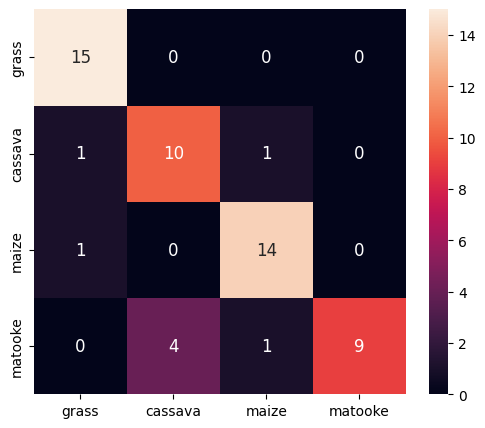

In [85]:
import seaborn as sns
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = pd.DataFrame(cm, range(4),range(4))
plt.figure(figsize = (6,5))

classes = ['grass','cassava','maize','matooke']

sns.heatmap(cm, annot=True, annot_kws={"size": 12},xticklabels=classes, yticklabels=classes) # font size
plt.show()

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
print(classification_report(y_test, y_pred, target_names= classes))

              precision    recall  f1-score   support

       grass       0.88      1.00      0.94        15
     cassava       0.71      0.83      0.77        12
       maize       0.88      0.93      0.90        15
     matooke       1.00      0.64      0.78        14

    accuracy                           0.86        56
   macro avg       0.87      0.85      0.85        56
weighted avg       0.87      0.86      0.85        56

